In [1]:
#! /usr/bin/env python3

import pandas as pd
import os
import sys

In [2]:
heu='vrbsp'
gur='vrbsp-ybm'
brkga='decoder'
problem='vrbsp'

### brkga results

In [3]:
def read_brkga(U):
    path = '../decoder/results/'+problem+'/U_' + str(U)
    f = [path + '/' + k for k in os.listdir(path) if "objectives.txt" in k]
    dfs = [pd.read_csv(planilha, sep=" ", header=None, names=['idx', 'ObjValue', 'Eval']) for planilha in f]
    
    return dfs

In [13]:
def read_heuristic(U):
    path = '../results_final/vns/'+problem+'/U_' + str(U)
    
    f = [path + '/objective_improvements' + str(k) + '.txt' for k in range(1, 31, 1)]
    dfs = [pd.read_csv(planilha, sep=" ", header=None, names=['CurrTime', 'ObjValue']) for planilha in f]
    return dfs

In [44]:
indexes = [8]#, 512, 1024, 2048]
for u in indexes:
    gur = read_gurobi(u, 'vrbsp')    
    
    vns_ = read_heuristic(u)
    vns = [x.iloc[0,1] for x in vns_]
    
    datafinal = pd.DataFrame(data=[gur, vns]).T
    datafinal['gap'] = [(datafinal.iloc[i, 0] - datafinal.iloc[i, 1]) / datafinal.iloc[i, 1] \
                        for i in range(len(datafinal))]
    print(datafinal)
    print(datafinal['gap'].mean() * 100)

FileNotFoundError: [Errno 2] File ../results_final/gurobi/results/vrbsp/U_8/result_information.txt does not exist: '../results_final/gurobi/results/vrbsp/U_8/result_information.txt'

In [45]:
### COMPARING VNS WITH CH
indexes = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
for u in indexes:
    dframes = read_heuristic(u)
    arr = [[],[]]

    for z in dframes:
        for y in range(2):
            if y == 0:
                arr[0].append(z.iloc[0, 1])
            else:
                arr[1].append(z.iloc[-1, 1])
                
    datafinal = pd.DataFrame(data=arr).T
    datafinal['gap'] = [(datafinal.iloc[i, 1] - datafinal.iloc[i, 0]) / datafinal.iloc[i, 0] \
                        for i in range(len(datafinal))]

    print(datafinal['gap'].mean() * 100)

4.538496940083667
6.238939707237143
8.844929415879884
15.69276826471964
23.8989055377754
25.214030060838077
28.072133588501863
32.47891274244302
39.5766552760516


In [57]:
import matplotlib.pyplot as plt
indexes = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
for u in indexes:
    dframes = read_heuristic(u)
    vns = [df.iloc[0,1] for df in dframes]
    df = pd.DataFrame(data=vns)
    # print(df.median())
    mybox = plt.figure()
    plt.title('Boxplot of instance with ' + str(u) + ' devices')
    plt.xlabel('')
    boxplot = df.boxplot(grid=False)
    
    mybox.savefig("CH_U_" + str(u) + ".eps")

In [63]:
def read_gurobi(U, problem):
    path = "../results_final/gurobi/results/" + problem + "/U_"+ str(U) +"/result_information.txt"
    df = pd.read_csv(path, header=None, sep=" ", names=["idx","ObjVal","ObjBoundC","MIPGap","NumVars", "NumConstrs", "NumNZs","IterCount", "NodeCount","Runtime"])
    # print(df)
    # df.drop(columns=['idx', "NumVars", "NumConstrs", "IterCount"], inplace=True)
    return df['ObjVal'].tolist()

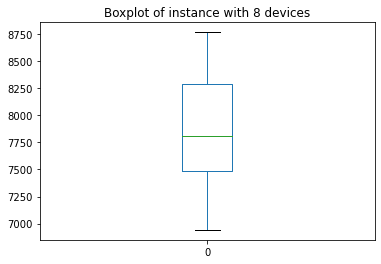

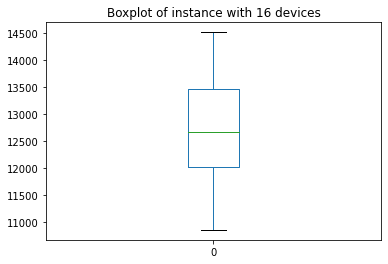

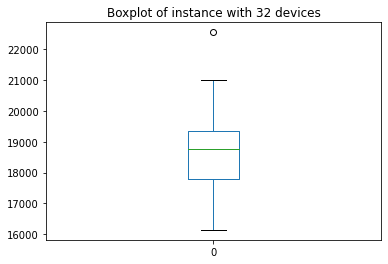

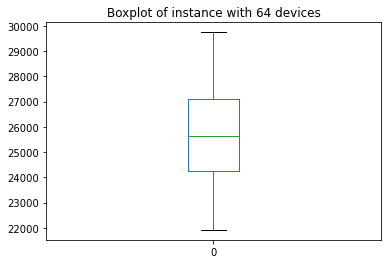

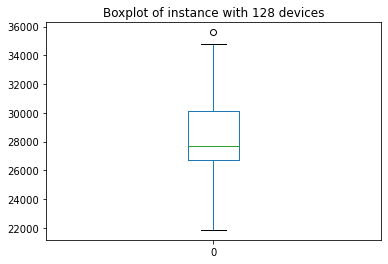

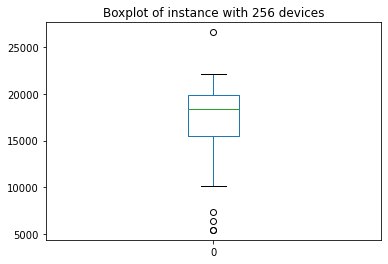

In [67]:
import matplotlib.pyplot as plt
indexes = [8, 16, 32, 64, 128, 256]
for u in indexes:
    df = pd.DataFrame(data=read_gurobi(u, "vrbsp-xijcm"))
    mybox = plt.figure()
    plt.title('Boxplot of instance with ' + str(u) + ' devices')
    plt.xlabel('')
    boxplot = df.boxplot(grid=False)
    
    mybox.savefig("VR2_U_" + str(u) + ".eps")